In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import callbacks

In [2]:
class_names = ['Parasitized','Uninfected']
label_names = {'Parasitized':0,'Uninfected':1}
print(label_names)

{'Parasitized': 0, 'Uninfected': 1}


In [3]:
img_size = (150,150)
img_folder = r'/Users/pradhammummaleti/Desktop/jupyter/cell_images/cell_images'

In [4]:
def create_dataset():

    directory = r'/Users/pradhammummaleti/Desktop/jupyter/cell_images/cell_images'
    folders = ["Parasitized","Uninfected"]
    images = []
    labels = []


    for folder in os.listdir(directory):
        if folder == ".DS_Store":
            continue
        
        label = label_names[folder]

        for file in os.listdir(os.path.join(directory,folder)):

            img_path = os.path.join(os.path.join(directory,folder), file)

            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, img_size)
                images.append(image / 255.0)
                labels.append(label)
            else:
                print(f"Failed to load image: {img_path}")

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images,labels
            
    

In [5]:
(images,labels) = create_dataset()

# img = cv2.imread('/Users/pradhammummaleti/Desktop/jupyter/cell_images/cell_images/Parasitized/C39P4thinF_original_IMG_20150622_105803_cell_97.png')
# img = img/255.0
# img = np.array(img)
# print("Image Shape:", img.shape)
# print("Pixel Values (min, max):", img.min(), img.max())
# plt.imshow(img)
# print(img)

Failed to load image: /Users/pradhammummaleti/Desktop/jupyter/cell_images/cell_images/Parasitized/.DS_Store
Failed to load image: /Users/pradhammummaleti/Desktop/jupyter/cell_images/cell_images/Uninfected/.DS_Store


In [6]:
train_images, test_images, train_labels,test_labels = train_test_split(images,labels,test_size=0.2, random_state=42)

In [7]:
print('Training Features Shape:',train_images.shape)
print('Training Labels Shape:',train_labels.shape)
print('Testing Features Shape:',test_images.shape)
print('Testing Labels Shape:',test_labels.shape)

Training Features Shape: (22046, 150, 150, 3)
Training Labels Shape: (22046,)
Testing Features Shape: (5512, 150, 150, 3)
Testing Labels Shape: (5512,)


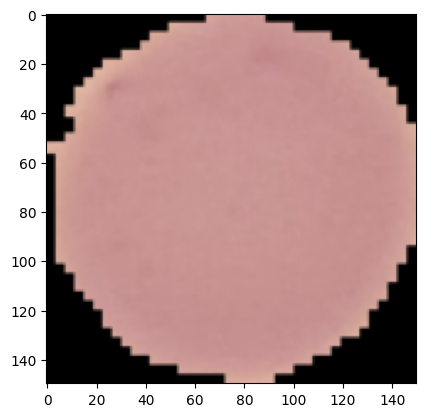

In [8]:
idx = random.randint(0,len(train_images))
plt.imshow(train_images[idx])
plt.show()

In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [14]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])

In [15]:
earlystopping = callbacks.EarlyStopping(monitor = "val_loss", mode = "min", patience = 5,restore_best_weights = True,verbose = 1)

In [16]:
history = model.fit(train_images,train_labels,epochs = 10,batch_size = 32, validation_data=(test_images, test_labels), callbacks = [earlystopping])

Epoch 1/10
689/689 [==============================] - 307s 442ms/step - loss: 0.3489 - accuracy: 0.8495 - val_loss: 0.1690 - val_accuracy: 0.9419
Epoch 2/10
689/689 [==============================] - 297s 430ms/step - loss: 0.1710 - accuracy: 0.9462 - val_loss: 0.1520 - val_accuracy: 0.9481
Epoch 3/10
689/689 [==============================] - 295s 428ms/step - loss: 0.1414 - accuracy: 0.9542 - val_loss: 0.1312 - val_accuracy: 0.9588
Epoch 4/10
689/689 [==============================] - 296s 430ms/step - loss: 0.1249 - accuracy: 0.9587 - val_loss: 0.1393 - val_accuracy: 0.9541
Epoch 5/10
689/689 [==============================] - 300s 435ms/step - loss: 0.1117 - accuracy: 0.9621 - val_loss: 0.1237 - val_accuracy: 0.9570
Epoch 6/10
689/689 [==============================] - 305s 443ms/step - loss: 0.0969 - accuracy: 0.9674 - val_loss: 0.1286 - val_accuracy: 0.9579
Epoch 7/10
689/689 [==============================] - 303s 440ms/step - loss: 0.0883 - accuracy: 0.9689 - val_loss: 0.1431 -

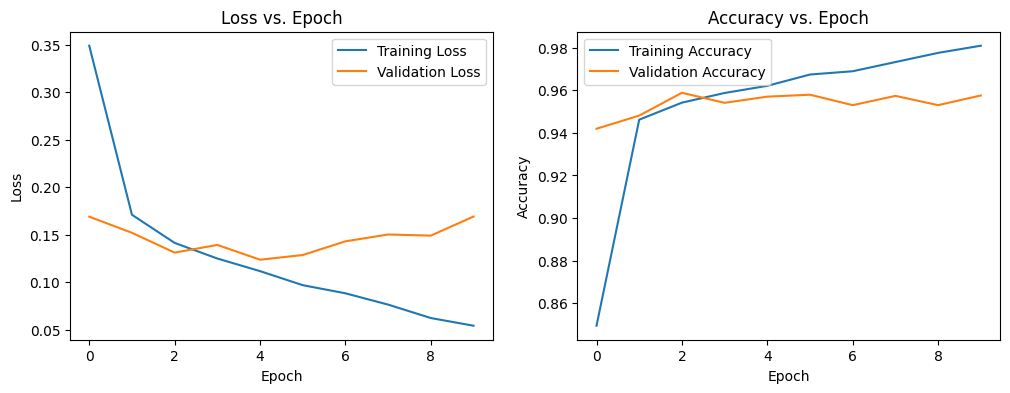

In [17]:
# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epoch')

plt.show()








In [146]:
model.evaluate(test_images,test_labels)

173/173 [==============================] - 12s 66ms/step - loss: 0.1749 - accuracy: 0.9351


[0.1748572587966919, 0.9350507855415344]